In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/home/sahana/movie-box-office-prediction/data/raw/bollywood_2022.csv')


In [6]:
# Check the first few rows of the dataset
df.head()

,Movie,Worldwide,India Net,India Gross,Overseas,Budget,Verdict,Movie Type,Released Date
0,JugJugg Jeeyo,74.50,50.24,54.50,20.0,100,NaN,Bollywood,24-Jun-22
1,Virata Parvam,4.20,5.12,2.90,1.3,1,NaN,Tollywood,17-Jun-22
2,Naadi Dosh,8.15,7.87,8.15,0.0,1,NaN,Gollywood,17-Jun-22
3,Veetla Vishesham,9.60,7.40,8.60,1.0,1,NaN,Kollywood,17-Jun-22
4,Nikamma,0.80,2.19,0.60,0.2,1,NaN,Bollywood,17-Jun-22


In [7]:
# Check for missing values
df.isnull().sum()

Movie             0
Worldwide         0
India Net         0
India Gross       0
Overseas          0
Budget            0
Verdict          37
Movie Type        0
Released Date     0
dtype: int64

In [8]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie          100 non-null    object 
 1   Worldwide      100 non-null    float64
 2   India Net      100 non-null    float64
 3   India Gross    100 non-null    float64
 4   Overseas       100 non-null    float64
 5   Budget         100 non-null    int64  
 6   Verdict        63 non-null     object 
 7   Movie Type     100 non-null    object 
 8   Released Date  100 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 7.2+ KB


In [9]:
# Get a summary of numerical columns
df.describe()

,Worldwide,India Net,India Gross,Overseas,Budget
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,311.761201,55.035101,62.586201,151.715000,79.040000
std,1228.726280,122.760349,144.011014,699.455603,234.986693
min,0.000100,0.000100,0.000100,0.000000,1.000000
25%,4.087500,5.270000,3.750000,0.000000,1.000000
50%,23.000000,17.970000,18.300000,3.100000,5.000000
75%,83.500000,50.315000,56.875000,19.025000,60.000000
max,10170.000000,859.550000,1000.650000,5640.000000,1500.000000


In [10]:
df.dropna(subset=['Verdict'], inplace=True)


In [11]:
df['Verdict'].fillna(df['Verdict'].mode()[0], inplace=True)


/tmp/ipykernel_11996/3768725812.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Verdict'].fillna(df['Verdict'].mode()[0], inplace=True)


In [12]:
#onvert Released Date to datetime: It's important to convert the Released Date column into a datetime object for easier manipulation:
df['Released Date'] = pd.to_datetime(df['Released Date'], format='%d-%b-%y')


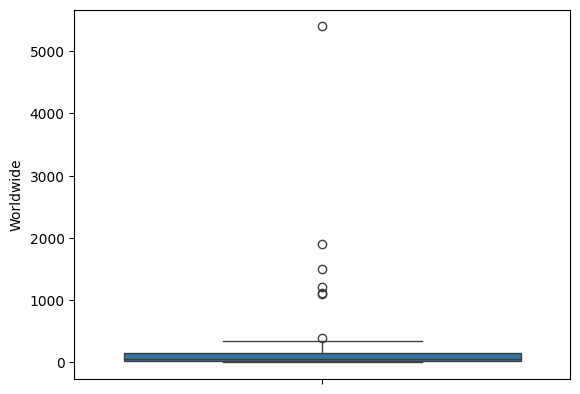

In [ ]:
#Handle Outliers
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df['Worldwide'])
plt.show()


In [15]:
df['Worldwide'] = df['Worldwide'].clip(upper=df['Worldwide'].quantile(0.95))


Feature Engineering

Extract Month from Released Date: This helps to understand seasonal trends.

In [16]:
df['Release Month'] = df['Released Date'].dt.month


Budget-to-Revenue Ratio: This is an important feature that could help predict how movies perform relative to their budget.

In [18]:
df['Budget-to-Revenue'] = df['Budget'] / df['Worldwide']


One-Hot Encode Movie Type: Use one-hot encoding to convert categorical variables into numerical ones.

In [19]:
df = pd.get_dummies(df, columns=['Movie Type'], drop_first=True)


Scale Numerical Features: Normalize the numerical features like Budget, India Net, and Worldwide using MinMaxScaler.

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Budget', 'India Net', 'Worldwide']] = scaler.fit_transform(df[['Budget', 'India Net', 'Worldwide']])


Save the Processed Data

In [22]:
df.to_csv('/home/sahana/movie-box-office-prediction/data/processed/bollywood_movies_processed.csv', index=False)
